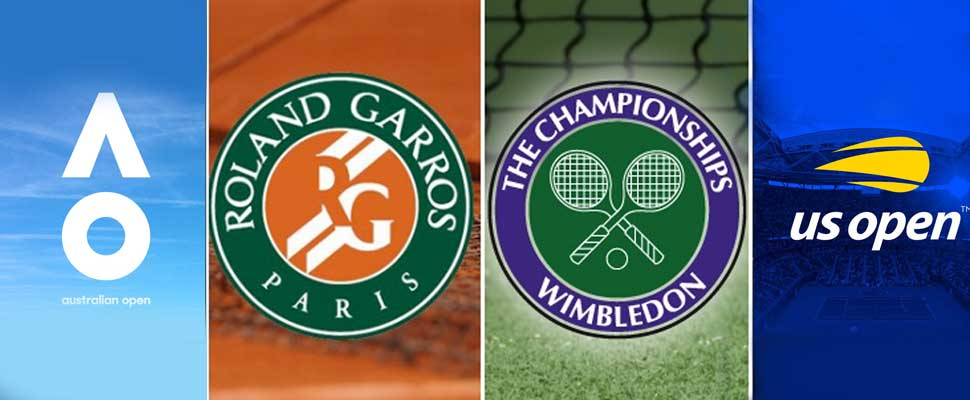

<h1><center>Predicting Tennis Match Results</center></h1>
<center>by Melinda Yan</center>

## Introduction

On May 8, 2022, Carlos Alcaraz, 19 year old Spanish professional tennis player, defeated World Number 1 Novak Djokovic in a 3-set thriller at the Madrid Open. Looking at the statistics of the match, the most surprising statistic was that Alcaraz won 100% of his second serves. To someone unfamiliar with tennis terminology, this may not mean all that much. Refer to the following link for a comprenhensive list of tennis terms: https://en.wikipedia.org/wiki/Glossary_of_tennis_terms. There are four main grand slam tennis tournaments yearly which are namely Australian Open, French Open, Wimbledon, and US Open. These four grand slam tournaments are the most famous tennis tournaments all over the world. Needless to say, the court surfaces of these mega tennis events are also different. Australian and US Open are to be played on hard courts, French Open is to be played on
clay courts and Wimbledon is to be played on grass courts. Every court surface has its own features and creates
variations in bounce and speed of the ball. Clay courts produce gentler paced ball and an equally accurate bounce
with extra spin. Hard courts produce faster paced ball and very accurate bounces. Grass courts produce faster ball
movements with added unpredictable types of bounces. Furthermore, the scoring systems of men’s and women’s
singles matches in grand slam tournaments are also different. Typically, in men’s matches, a player who wins three
sets out of five sets wins the match. Whereas, in the women’s matches, the first player winning two sets out of three
sets wins the match.

With Madrid Open underway leading up to the French Open, coaching staff, new agencies, and spectators are beginning to talk about winner predictions. With technological advancements, these prediction models evaluate a player's chances of winning matches, but developing these models is a difficult task given so many unpredictable variables. The goal of this project is to determine what the significant statistics of a match would be in order to predict the result of the match. I chose this dataset because the grand slams are the most important tennis tournaments and the different surfaces allow us to see which statistics are signficant regardless of surface.

## Data Collection

The datasets used for this project were from the UCI Machine Learning Repository. Link to the datasets is here: https://archive.ics.uci.edu/ml/datasets/Tennis+Major+Tournament+Match+Statistics

There were 8 datasets total, one per Grand Slam and Gender. Each row of the data represents one match played in the tournament and includes a variety of numerial factors about the match. All of the variables listed below are collected for both players, represented in the dataset with a ".1" or ".2" for Player1 and Player2, respectively. For example, FSP.1 is the First Serve Percentage for Player 1 and FSP.2 is the First Serve Percentage for Player 2.

| Attibute | Desciption |
| :- | :- |
| Player1 | Name of Player 1|
| Player2 | Name of Player 2|
| Result | 1 if Player 1 wins, 0 otherwise |
| FSP | First serve % |
| FSW | Win % on 1st serve |
| SSP | Second serve % |
| SSW | Win % on 2nd serve |
| ACE | Aces won |
| DBF | Double faults commited|
| WNR | Winners hit|
| UFE | Unforced error commited |
| BPC | Break points created|
| BPW | Break points won |
| NPA | Net points attempted|
| NPW | Net points won |
| TPW | Total points won |
| ST1 | Games won in set 1 |
| ST2 | Games won in set 2 |
| ST3 | Games won in set 3 |
| ST4 | Games won in set 4 |
| ST5 | Games won in set 5 |
| FNL | Final number of sets wons |
| Round | Round of the tournamnet at which game is played

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as met

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [2]:
# create dataframe for Australian Open
aus_open_men = pd.read_table("AusOpen-men-2013.csv", sep=",")
aus_open_men.name = "aus_open_men"
aus_open_women = pd.read_table("AusOpen-women-2013.csv", sep=",")
aus_open_women.name = "aus_open_women"

# create dataframe for French Open
french_open_men = pd.read_table("FrenchOpen-men-2013.csv", sep=",")
french_open_men.name = "french_open_men"
french_open_women = pd.read_table("FrenchOpen-women-2013.csv", sep=",")
french_open_women.name = "french_open_women"

# create dataframe for Wimbledon
wimbledon_men = pd.read_table("Wimbledon-men-2013.csv", sep=",")
wimbledon_men.name = "wimbledon_men"
wimbledon_women = pd.read_table("Wimbledon-women-2013.csv", sep=",")
wimbledon_women.name = "wimbledon_women"

# create dataframe for US Open
us_open_men = pd.read_table("USOpen-men-2013.csv", sep=",")
us_open_men.name = "us_open_men"
us_open_women = pd.read_table("USOpen-women-2013.csv", sep=",")
us_open_women.name = "us_open_women"

In [3]:
# list of all datasets as dataframes
data_frames = [aus_open_men, aus_open_women, french_open_men, french_open_women, \
               wimbledon_men, wimbledon_women, us_open_men, us_open_women]

# check the number of columns and rows:
for df in data_frames:
    print(df.name + ": " + str(len(df.columns)) + " attributes, " + str(len(df.index)) + " instances")

aus_open_men: 42 attributes, 126 instances
aus_open_women: 42 attributes, 127 instances
french_open_men: 42 attributes, 125 instances
french_open_women: 42 attributes, 127 instances
wimbledon_men: 42 attributes, 114 instances
wimbledon_women: 42 attributes, 122 instances
us_open_men: 42 attributes, 126 instances
us_open_women: 42 attributes, 76 instances


We can see that the number of attributes is the same, but the number of matches played varys for each Grand Slam. Now we are going to standardize all of the column names using the notation described above.

In [4]:
# list of grand slams to be added as column
grand_slam = ["AusOpen", "FrenchOpen", "Wimbledon", "USOpen"]

# variable that switches between "men" and "women"
gender = "men"

# standardized column names
columns = wimbledon_men.columns
pos = 0

# compare column names with standardized one above
for df in data_frames:
    # for each column name in df
    for i in range(len(df.columns)): 
        # If not like contol name 
        if df.columns[i] != columns[i]:
            wrong_name = df.columns[i]
            # Replace by the correct name
            df.rename(columns = {str(df.columns[i]): str(columns[i])}, inplace = True) 
            print(df.name + ": The following label", wrong_name,"was changed for", df.columns[i])
    
    # add additional info as columns in dataframe        
    df["Gender"] = gender
    df["GrandSlam"] = grand_slam[pos//2]
    gender = "women" if gender == "men" else "men"
    pos += 1

aus_open_men: The following label FNL1 was changed for FNL.1
aus_open_men: The following label FNL2 was changed for FNL.2
aus_open_women: The following label FNL1 was changed for FNL.1
aus_open_women: The following label FNL2 was changed for FNL.2
wimbledon_women: The following label ST1.1.1 was changed for ST1.2
us_open_men: The following label FNL1 was changed for FNL.1
us_open_men: The following label FNL2 was changed for FNL.2
us_open_women: The following label Player 1 was changed for Player1
us_open_women: The following label Player 2 was changed for Player2
us_open_women: The following label ROUND was changed for Round
us_open_women: The following label ST2.1.1 was changed for ST1.2


In [5]:
# merge it in one unique dataframe
gs_matches = pd.concat(data_frames, ignore_index = True)

gs_matches

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,Gender,GrandSlam
0,Lukas Lacko,Novak Djokovic,1,0,0.0,3.0,61,35,39,18,...,8.0,9.0,101.0,6.0,7.0,6.0,NaN,NaN,men,AusOpen
1,Leonardo Mayer,Albert Montanes,1,1,3.0,0.0,61,31,39,13,...,NaN,NaN,42.0,1.0,3.0,1.0,NaN,NaN,men,AusOpen
2,Marcos Baghdatis,Denis Istomin,1,0,0.0,3.0,52,53,48,20,...,12.0,16.0,126.0,6.0,7.0,6.0,NaN,NaN,men,AusOpen
3,Dmitry Tursunov,Michael Russell,1,1,3.0,0.0,53,39,47,24,...,NaN,NaN,79.0,2.0,2.0,3.0,NaN,NaN,men,AusOpen
4,Juan Monaco,Ernests Gulbis,1,0,1.0,3.0,76,63,24,12,...,16.0,28.0,127.0,1.0,6.0,7.0,6.0,NaN,men,AusOpen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,P Ormaechea,K Date-Krumm,1,1,2.0,0.0,59,32,41,10,...,14.0,9.0,NaN,3.0,6.0,NaN,NaN,NaN,women,USOpen
939,K Pliskova,E Bouchard,1,0,1.0,2.0,53,48,47,21,...,13.0,10.0,NaN,4.0,6.0,7.0,NaN,NaN,women,USOpen
940,L Hradecka,A Kerber,1,0,0.0,2.0,49,17,51,4,...,6.0,5.0,NaN,6.0,6.0,NaN,NaN,NaN,women,USOpen
941,L Davis,C Suarez Navarro,1,0,0.0,2.0,63,12,37,3,...,10.0,8.0,NaN,6.0,6.0,NaN,NaN,NaN,women,USOpen


Combining all 8 dataseets into one large dataframe allows to have all match information in one place. The extra columns of "Gender" and "GrandSlam" provide a way to differentiate between each event. 

## Data Processing

### Match Retirements

It is not uncommon that players do not finish a match, often due to injuries. This would lead to incomplete match statistics and do not provide a true representation of a player's performance in relation to their win. If a men's match was played to completions, either Player 1 or Player 2 would have won 3 sets, which would be in "FNL.X". Similar idea of women's matches except it would be 2 sets won. These conditions and missing values are tested below. 

In [6]:
# list of matches that did not finish
incomplete = []
# check for unfinished matches, different criteria for each gender
for index, row in gs_matches.iterrows():
    if np.isnan(row["FNL.1"]) or np.isnan(row["FNL.2"]):
        incomplete.append(index)
    elif row["Gender"] == "men" and row["FNL.1"] != 3 and row["FNL.2"] != 3:
            incomplete.append(index)
    elif row["Gender"] == "women"  and row["FNL.1"] != 2 and row["FNL.2"] != 2:
            incomplete.append(index)
        
print(incomplete)
        
print(gs_matches.loc[[15]])

[7, 15, 24, 33, 38, 40, 63, 78, 170, 272, 288, 291, 295, 296, 299, 312, 344, 454, 455, 575, 590, 716, 748, 777, 806]
               Player1         Player2  Round  Result  FNL.1  FNL.2  FSP.1  \
15  Stanislas Wawrinka  Andrey Golubev      1       1    2.0    0.0     63   

    FSW.1  SSP.1  SSW.1  ...  NPA.2  NPW.2  TPW.2  ST1.2  ST2.2  ST3.2  ST4.2  \
15     20     37      6  ...    6.0   12.0   37.0    4.0    1.0    NaN    NaN   

    ST5.2  Gender  GrandSlam  
15    NaN     men    AusOpen  

[1 rows x 44 columns]


Of the 943 matches, 25 do not have complete match statistics. The information for one such match that did not finish is displayed. According to a Sportsnet article, Andrey Golubev retired with an injured left leg from the 2013 Australian Open match against Stanislas Wawrinka after just 15 games.

In [7]:
# remove matches that did not finish
gs_matches.drop(incomplete, inplace=True)
gs_matches.reset_index(inplace=True, drop=True)

gs_matches

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,Gender,GrandSlam
0,Lukas Lacko,Novak Djokovic,1,0,0.0,3.0,61,35,39,18,...,8.0,9.0,101.0,6.0,7.0,6.0,NaN,NaN,men,AusOpen
1,Leonardo Mayer,Albert Montanes,1,1,3.0,0.0,61,31,39,13,...,NaN,NaN,42.0,1.0,3.0,1.0,NaN,NaN,men,AusOpen
2,Marcos Baghdatis,Denis Istomin,1,0,0.0,3.0,52,53,48,20,...,12.0,16.0,126.0,6.0,7.0,6.0,NaN,NaN,men,AusOpen
3,Dmitry Tursunov,Michael Russell,1,1,3.0,0.0,53,39,47,24,...,NaN,NaN,79.0,2.0,2.0,3.0,NaN,NaN,men,AusOpen
4,Juan Monaco,Ernests Gulbis,1,0,1.0,3.0,76,63,24,12,...,16.0,28.0,127.0,1.0,6.0,7.0,6.0,NaN,men,AusOpen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,P Ormaechea,K Date-Krumm,1,1,2.0,0.0,59,32,41,10,...,14.0,9.0,NaN,3.0,6.0,NaN,NaN,NaN,women,USOpen
914,K Pliskova,E Bouchard,1,0,1.0,2.0,53,48,47,21,...,13.0,10.0,NaN,4.0,6.0,7.0,NaN,NaN,women,USOpen
915,L Hradecka,A Kerber,1,0,0.0,2.0,49,17,51,4,...,6.0,5.0,NaN,6.0,6.0,NaN,NaN,NaN,women,USOpen
916,L Davis,C Suarez Navarro,1,0,0.0,2.0,63,12,37,3,...,10.0,8.0,NaN,6.0,6.0,NaN,NaN,NaN,women,USOpen


There are 918 matches that played to completion. We now turn out attention to missing values and imputing data. 

### Missing Values and Imputation

In [8]:
# print the number of NAs in our dataset per variable
gs_matches.isna().sum()

Player1        0
Player2        0
Round          0
Result         0
FNL.1          0
FNL.2          0
FSP.1          0
FSW.1          0
SSP.1          0
SSW.1          0
ACE.1         22
DBF.1          6
WNR.1        123
UFE.1        123
BPC.1          0
BPW.1          0
NPA.1         83
NPW.1         82
TPW.1        309
ST1.1          0
ST2.1          0
ST3.1        309
ST4.1        701
ST5.1        832
FSP.2          0
FSW.2          0
SSP.2          0
SSW.2          0
ACE.2         22
DBF.2          6
WNR.2        123
UFE.2        123
BPC.2          0
BPW.2          0
NPA.2         83
NPW.2         82
TPW.2        309
ST1.2          0
ST2.2          0
ST3.2        309
ST4.2        701
ST5.2        832
Gender         0
GrandSlam      0
dtype: int64

#### Aces NaN

From the summary of missing values above, it is curious that ACE.1 and ACE.2 are equal. It is possible that this statistic was not recorded for that particular match.

In [9]:
# print the NaNs for the Aces
ace1_nan = gs_matches["ACE.1"].isna()
ace2_nan = gs_matches["ACE.2"].isna()
ace_nan = np.logical_or(ace1_nan,ace2_nan)

print(str(gs_matches[ace_nan].shape[0]) + " rows with missing aces values")

22 rows with missing aces values


Our inference above is correct in that the missing values of ACE.1 and ACE.2 occur in the same match. We decided to impute by mean to fill in the missing values. According to the table below, all of the missing ACE values occur in women's matches across three Grand Slams. Typically, women do not hit as many aces as men, so it would not make sense to take men's aces statistics into consideration. Thus we differentiate by Gender and Grand Slam. The logic above is used for all imputations computed below.

In [10]:
# impute by the mean differentiating by Gender and Grand Slam
gs_matches["ACE.1"].fillna(gs_matches.groupby(["Gender", "GrandSlam"])["ACE.1"].transform("mean"), inplace=True)
gs_matches["ACE.2"].fillna(gs_matches.groupby(["Gender", "GrandSlam"])["ACE.2"].transform("mean"), inplace=True)

gs_matches[ace_nan][["ACE.1", "ACE.2"]]

,ACE.1,ACE.2
132,3.148760,2.694215
172,3.148760,2.694215
211,3.148760,2.694215
224,3.148760,2.694215
228,3.148760,2.694215
365,2.508929,1.794643
366,2.508929,1.794643
379,2.508929,1.794643
380,2.508929,1.794643
392,2.508929,1.794643


#### Double Faults NaN

In [11]:
# print NaNs for Double faults
dbf1_nan = gs_matches["DBF.1"].isna()
dbf2_nan = gs_matches["DBF.2"].isna()
dbf_nan = np.logical_or(dbf1_nan,dbf2_nan)

print(str(gs_matches[dbf_nan].shape[0]) + " rows with missing double fault values")

6 rows with missing double fault values


The 6 instances of DBF.X occur in the same matches. There does not appear to be a single event where this statistic is missing, so we impute by mean.

In [12]:
# impute by the mean differentiating by Gender and Grand Slam
gs_matches["DBF.1"].fillna(gs_matches.groupby(["Gender", "GrandSlam"])["DBF.1"].transform("mean"), inplace=True)
gs_matches["DBF.2"].fillna(gs_matches.groupby(["Gender", "GrandSlam"])["DBF.2"].transform("mean"), inplace=True)

gs_matches[dbf_nan][["DBF.1", "DBF.2"]]

,DBF.1,DBF.2
7,4.350427,4.615385
294,2.947826,3.626087
300,2.947826,3.626087
427,2.902439,3.065041
484,2.902439,3.065041
549,3.468468,3.387387


#### Winners and Unforced Errors NaN

In [13]:
# print NaNs for the Winners and Unforced errors
wnr1_nan = gs_matches["WNR.1"].isna()
wnr2_nan = gs_matches["WNR.2"].isna()
ufe1_nan = gs_matches["UFE.1"].isna()
ufe2_nan = gs_matches["UFE.2"].isna()
wnr_and_ufe_nan = np.logical_or.reduce([wnr1_nan,wnr2_nan,ufe1_nan,ufe2_nan])

print(str(gs_matches[wnr_and_ufe_nan].shape[0]) + " rows with missing winners or unforced errors values")

123 rows with missing winners or unforced errors values


In [14]:
len(gs_matches[wnr_and_ufe_nan].loc[(gs_matches["Gender"] == "men") & (gs_matches["GrandSlam"] == "USOpen")])

123

Based on the analysis above, it is clear that all 123 missing instances of Winners and Unforced Errors occur in the Men's US Open. It does not make sense to impute by mean like we have done above since an entire tournament's statistic is missing. After researching online, there is another dataset that contains match statistics for the 2013 US Open. The relevant information is broken into two datasets: one of matches and their corresponding IDs and another with the point by point statistics for each match labelled by match ID. 

In [15]:
# create dataframe for match IDs
us_open_ids = pd.read_table("2013-usopen-matches.csv", sep=",", 
             usecols=["match_id","player1","player2"])
# create dataframe for point-by-point statistics, focusing on winners and unforced errors
us_open_matches = pd.read_table("2013-usopen-points.csv", sep=",", 
             usecols=["match_id","P1UnfErr","P2UnfErr","P1Winner","P2Winner"])

# sum statistics for each match
us_open_matches_grouped = us_open_matches.groupby("match_id").sum().reset_index()
# merge dataframes on match IDs
us_matches_found = pd.merge(us_open_ids,us_open_matches_grouped,on="match_id")

# rename columns to match with original dataframe to merge successfully
us_matches_found.rename(columns={"player1" : "Player1", "player2": "Player2",
                                 "P1Winner" : "WNR.1", "P2Winner" : "WNR.2",
                                 "P1UnfErr" : "UFE.1", "P2UnfErr" : "UFE.2"}, inplace=True)
del us_matches_found["match_id"]
us_matches_found

,Player1,Player2,WNR.1,WNR.2,UFE.1,UFE.2
0,Novak Djokovic,Ricardas Berankis,28,16,9,27
1,Benoit Paire,Alex Bogomolov Jr.,86,39,68,41
2,Tim Smyczek,James Duckworth,32,24,39,71
3,Rajeev Ram,Fabio Fognini,24,25,18,31
4,Tommy Haas,Paul-Henri Mathieu,38,24,13,26
...,...,...,...,...,...,...
162,Roberta Vinci,Flavia Pennetta,14,23,28,17
163,Daniela Hantuchova,Victoria Azarenka,19,17,18,15
164,Serena Williams,Na Li,19,8,20,24
165,Flavia Pennetta,Victoria Azarenka,19,15,23,25


In [16]:
# subset of Men's US Open from original merged dataframe
old_us_open_men = gs_matches[(gs_matches["Gender"] == "men") & (gs_matches["GrandSlam"] == "USOpen")].copy()
# replace missing values with statistics from second dataset
# use player names to match
old_us_open_men = old_us_open_men.drop(["WNR.1","WNR.2","UFE.1","UFE.2"], axis=1)
new_us_open_men = pd.merge(old_us_open_men, us_matches_found,on=["Player1","Player2"], how="left")

# finding where Men's US Open starts in original dataframe
index = gs_matches[(gs_matches["Gender"] == "men") & (gs_matches["GrandSlam"] == "USOpen")].index[0]

new_us_open_men


# update with calculated match statistics
for i in range(len(new_us_open_men)):
    gs_matches.loc[index+i,"UFE.1"] = new_us_open_men.loc[i,"UFE.1"]
    gs_matches.loc[index+i,"UFE.2"] = new_us_open_men.loc[i,"UFE.2"]
    gs_matches.loc[index+i,"WNR.1"] = new_us_open_men.loc[i,"WNR.1"]
    gs_matches.loc[index+i,"WNR.2"] = new_us_open_men.loc[i,"WNR.2"]

# count how many missing values are left
gs_matches[(gs_matches["Gender"] == "men") & (gs_matches["GrandSlam"] == "USOpen")][["WNR.1","WNR.2","UFE.1","UFE.2"]].isna().sum()

WNR.1    37
WNR.2    37
UFE.1    37
UFE.2    37
dtype: int64

After we impute the data, we reduced the number of missing winners and unforced errors from 123 instances to 37. Now we can fill in the rest of the missing values like we have done above. 

In [17]:
# impute remaining values by the mean differentiating by Gender and Grand Slam
gs_matches["UFE.1"].fillna(gs_matches.groupby(["Gender", "GrandSlam"])["UFE.1"].transform("mean"), inplace=True)
gs_matches["UFE.2"].fillna(gs_matches.groupby(["Gender", "GrandSlam"])["UFE.2"].transform("mean"), inplace=True)
gs_matches["WNR.1"].fillna(gs_matches.groupby(["Gender", "GrandSlam"])["WNR.1"].transform("mean"), inplace=True)
gs_matches["WNR.2"].fillna(gs_matches.groupby(["Gender", "GrandSlam"])["WNR.2"].transform("mean"), inplace=True)

gs_matches[wnr_and_ufe_nan][["WNR.1","WNR.2","UFE.1","UFE.2"]]

,WNR.1,WNR.2,UFE.1,UFE.2
719,40.000000,32.000000,18.00000,41.000000
720,36.325581,36.639535,36.94186,37.546512
721,36.325581,36.639535,36.94186,37.546512
722,36.325581,36.639535,36.94186,37.546512
723,36.325581,36.639535,36.94186,37.546512
...,...,...,...,...
837,32.000000,15.000000,45.00000,31.000000
838,15.000000,45.000000,30.00000,37.000000
839,38.000000,57.000000,46.00000,69.000000
840,26.000000,35.000000,32.00000,24.000000


#### Net Points NaN

There are 83 missing instances of net points attempted and 82 missing instances of net points won. There does not appear to be a single event where this statistic is missing, so we impute by mean.

In [18]:
# print NaNs for Net points attempted and won
npa1_nan = gs_matches["NPA.1"].isna()
npa2_nan = gs_matches["NPA.2"].isna()
npw1_nan = gs_matches["NPW.1"].isna()
npw2_nan = gs_matches["NPW.2"].isna()
npa_and_npw_nan = np.logical_or.reduce([npa1_nan,npa2_nan,npw1_nan,npw2_nan])

print(str(gs_matches[npa_and_npw_nan].shape[0]) + " rows with missing net point attempted or won values")

83 rows with missing net point attempted or won values


In [19]:
# impute by the mean differentiating by Gender and Grand Slam
gs_matches["NPA.1"].fillna(gs_matches.groupby(["Gender", "GrandSlam"])["NPA.1"].transform("mean"), inplace=True)
gs_matches["NPA.2"].fillna(gs_matches.groupby(["Gender", "GrandSlam"])["NPA.2"].transform("mean"), inplace=True)
gs_matches["NPW.1"].fillna(gs_matches.groupby(["Gender", "GrandSlam"])["NPW.1"].transform("mean"), inplace=True)
gs_matches["NPW.2"].fillna(gs_matches.groupby(["Gender", "GrandSlam"])["NPW.2"].transform("mean"), inplace=True)

gs_matches[npa_and_npw_nan][["NPA.1","NPA.2","NPW.1","NPW.2"]]

,NPA.1,NPA.2,NPW.1,NPW.2
1,14.791667,16.947917,23.125000,24.812500
3,14.791667,16.947917,23.125000,24.812500
8,14.791667,16.947917,23.125000,24.812500
13,14.791667,16.947917,23.125000,24.812500
15,14.791667,16.947917,23.125000,24.812500
...,...,...,...,...
801,18.500000,20.034884,28.127907,31.534884
802,18.500000,20.034884,28.127907,31.534884
807,18.500000,20.034884,28.127907,31.534884
890,14.256757,13.864865,9.573333,9.866667


### Relevant Attributes

There are certain statistics in the dataset that give up information about who won the match. For example, "FNL.X" is the number of sets won by each player. Knowing how many sets a player has won tells us who won the match. Other statistics that also give us similiar information are "ST" (Set score) and "TPW" (Total points won). Since we want to determine how match statistics relate to the outcome of a match, these columns should be deleted. We also want to be able to generalize our results for all players and all matches of a Grand Slam, so "Player" and "Round" are not necessary.

In [20]:
# delete irrelevant columns
gs_matches.drop(list(gs_matches.filter(regex="(Player)|(Round)|(FNL)|(ST)|(TPW)")), axis = 1, inplace = True)

gs_matches

,Result,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,...,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,Gender,GrandSlam
0,0,61,35,39,18,5.0,1.0,17.0,29.0,1.0,...,10.0,0.0,40.0,30.0,4.0,8.0,8.000000,9.0000,men,AusOpen
1,1,61,31,39,13,13.0,1.0,13.0,1.0,7.0,...,1.0,4.0,1.0,4.0,0.0,0.0,16.947917,24.8125,men,AusOpen
2,0,52,53,48,20,8.0,4.0,37.0,50.0,1.0,...,9.0,1.0,41.0,41.0,4.0,13.0,12.000000,16.0000,men,AusOpen
3,1,53,39,47,24,8.0,6.0,8.0,6.0,6.0,...,1.0,8.0,1.0,8.0,1.0,7.0,16.947917,24.8125,men,AusOpen
4,0,76,63,24,12,0.0,4.0,16.0,35.0,3.0,...,17.0,11.0,59.0,79.0,3.0,5.0,16.000000,28.0000,men,AusOpen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,59,32,41,10,2.0,5.0,24.0,35.0,13.0,...,0.0,3.0,14.0,43.0,9.0,4.0,14.000000,9.0000,women,USOpen
914,0,53,48,47,21,6.0,4.0,35.0,51.0,7.0,...,5.0,2.0,26.0,29.0,13.0,3.0,13.000000,10.0000,women,USOpen
915,0,49,17,51,4,3.0,7.0,20.0,31.0,0.0,...,0.0,1.0,11.0,6.0,8.0,5.0,6.000000,5.0000,women,USOpen
916,0,63,12,37,3,0.0,4.0,6.0,26.0,2.0,...,1.0,1.0,9.0,12.0,12.0,6.0,10.000000,8.0000,women,USOpen


In [21]:
# print the number of NAs in our dataset per variable
gs_matches.isna().sum()

Result       0
FSP.1        0
FSW.1        0
SSP.1        0
SSW.1        0
ACE.1        0
DBF.1        0
WNR.1        0
UFE.1        0
BPC.1        0
BPW.1        0
NPA.1        0
NPW.1        0
FSP.2        0
FSW.2        0
SSP.2        0
SSW.2        0
ACE.2        0
DBF.2        0
WNR.2        0
UFE.2        0
BPC.2        0
BPW.2        0
NPA.2        0
NPW.2        0
Gender       0
GrandSlam    0
dtype: int64

As a result of the data cleaning process, we do not have anymore missing values and are left with relevant match information, which will be used to predict match results.

## Exploratory Analysis & Data Visualization

In this section, we will visualize and explore trends in the data.

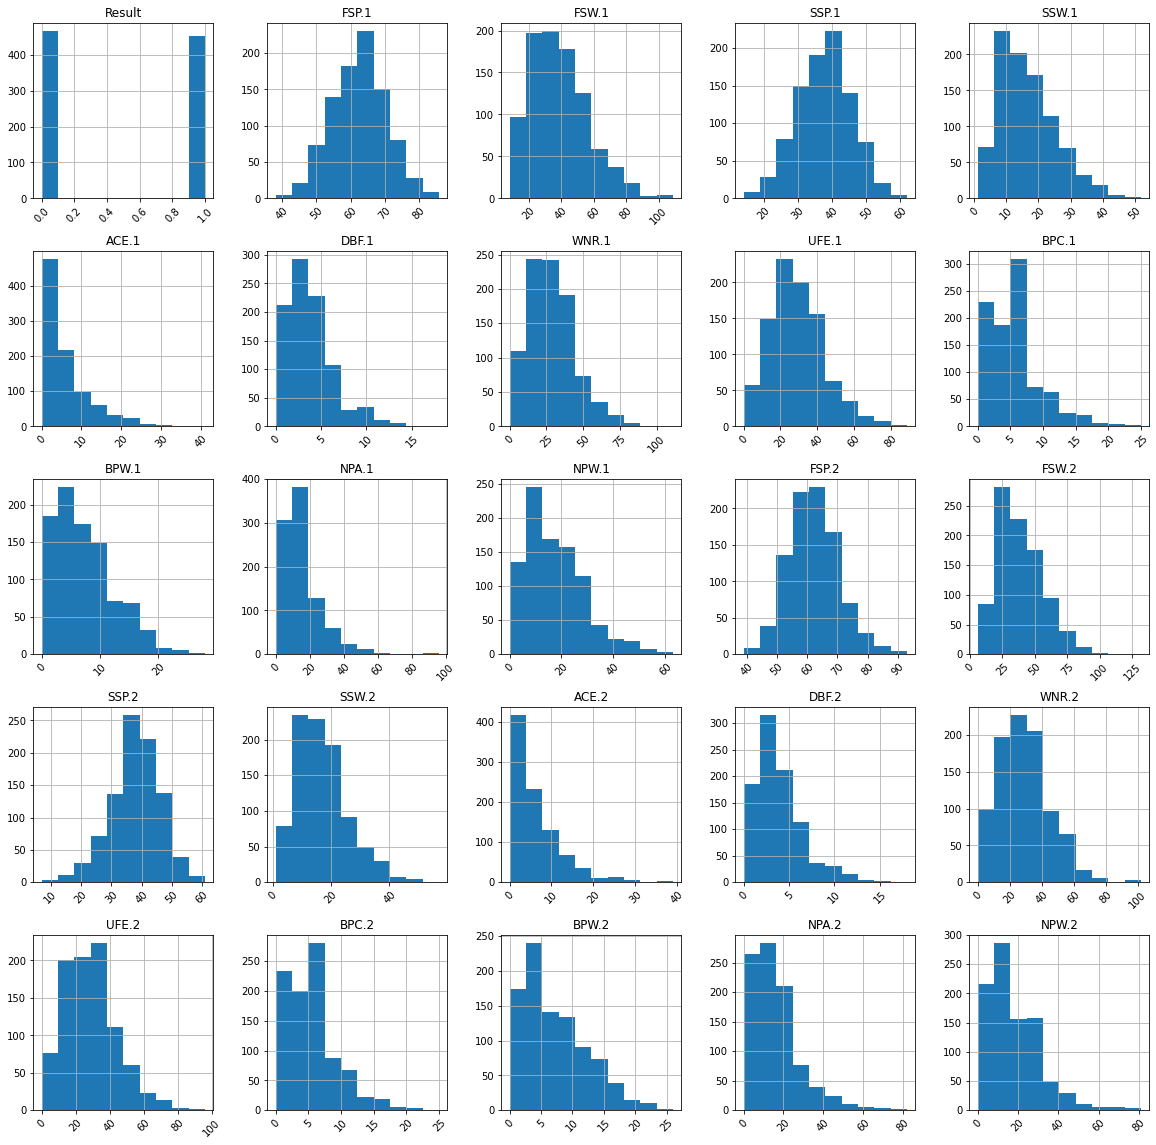

In [22]:
# histograms of each variable
gs_matches.hist(figsize=(20,20), xrot=45)
plt.show()

The plot above displays 25 histograms for each of the 25 numerial variables. The plot in the top left displays "Result", which is clearly binary (0 or 1), indicating whether Player1 wins or loses. Otherwise, most of the other plots are slightly skewed right. "ACE.1" and "ACE.2" are notable the most right skewed plots. This is unsurprising since hitting ACES is difficult at a professional level. Thus, it makes sense that a majority of these the values in these plots are less than 10. It is interesting that "SSP.1" and "SSP.2" are relatively normal.Both seem to be unimodal and centered about 40%. 

In [23]:
# correlation matrix
corr = gs_matches.corr()
corr

,Result,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,...,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2
Result,1.000000,0.131888,0.123556,-0.129100,0.074794,0.166633,-0.150128,0.185770,-0.211916,0.471248,...,0.105405,-0.120935,-0.168658,0.154198,-0.190601,0.202823,-0.429605,-0.398364,-0.004590,0.014911
FSP.1,0.131888,1.000000,0.176915,-0.996479,-0.375929,-0.083523,-0.357420,-0.035563,-0.174495,0.061882,...,-0.076173,-0.086890,-0.044301,-0.101922,0.040940,0.004479,-0.081515,-0.138866,0.040475,-0.014301
FSW.1,0.123556,0.176915,1.000000,-0.182324,0.715461,0.623200,0.259324,0.736369,0.453794,0.180030,...,0.015115,0.754927,0.573186,0.242573,0.674740,0.499484,0.026467,0.190634,0.537115,0.618707
SSP.1,-0.129100,-0.996479,-0.182324,1.000000,0.370111,0.080463,0.354159,0.031039,0.169491,-0.060337,...,0.081167,0.081530,0.040246,0.098879,-0.046823,-0.007461,0.081167,0.133289,-0.042257,0.009189
SSW.1,0.074794,-0.375929,0.715461,0.370111,1.000000,0.540209,0.351036,0.643909,0.466391,0.131985,...,0.069845,0.706916,0.539420,0.304349,0.580097,0.506164,0.002122,0.254613,0.450288,0.597020
ACE.1,0.166633,-0.083523,0.623200,0.080463,0.540209,1.000000,0.201876,0.701016,0.232486,0.108421,...,0.007619,0.493918,0.401592,0.131307,0.330752,0.144758,-0.149772,-0.080699,0.302092,0.324057
DBF.1,-0.150128,-0.357420,0.259324,0.354159,0.351036,0.201876,1.000000,0.194178,0.369781,-0.009066,...,0.021490,0.299498,0.195356,0.171875,0.145797,0.144522,0.187731,0.311470,0.077457,0.171390
WNR.1,0.185770,-0.035563,0.736369,0.031039,0.643909,0.701016,0.194178,1.000000,0.556450,0.247469,...,-0.077116,0.533185,0.402817,0.096263,0.527526,0.358160,-0.026034,0.045427,0.435665,0.473625
UFE.1,-0.211916,-0.174495,0.453794,0.169491,0.466391,0.232486,0.369781,0.556450,1.000000,-0.032687,...,-0.071204,0.454801,0.183173,0.098100,0.421452,0.515175,0.204294,0.503939,0.107569,0.288234
BPC.1,0.471248,0.061882,0.180030,-0.060337,0.131985,0.108421,-0.009066,0.247469,-0.032687,1.000000,...,0.009000,0.023977,-0.057498,0.196089,0.026417,0.197391,0.248982,-0.317779,0.346221,0.037572


Above displays the correlations between every pair of variables. The correlations can be better displayed using a heatmap.

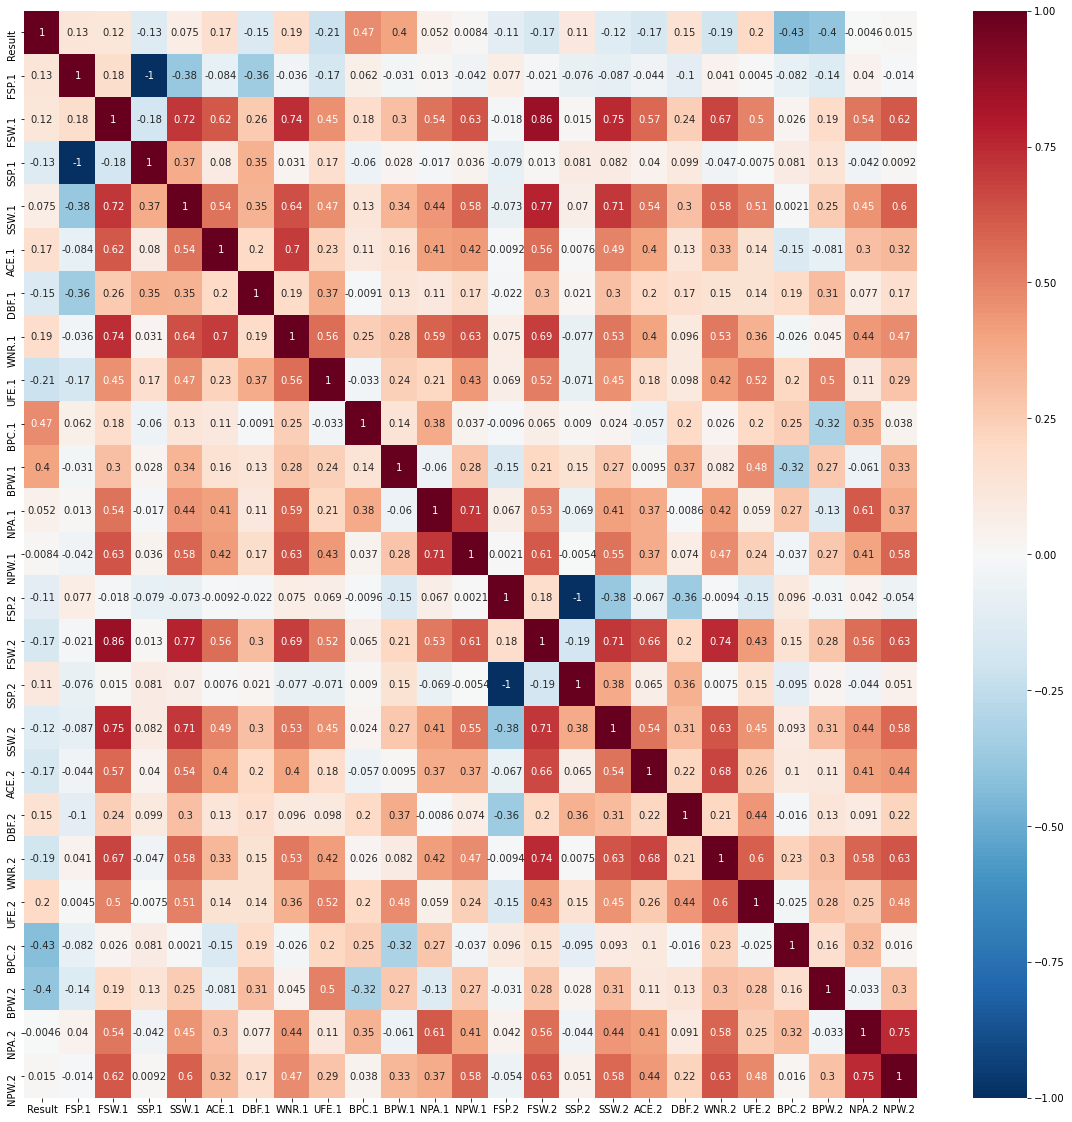

In [24]:
# heatmap visualizing correlations from above
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap="RdBu_r", annot=True, vmax=1, vmin=-1)
plt.show()

The heatmap shows in a glance which variables are correlated, to what degree, and in which direction. Darker red (or closer to +1) means a stronger positive relationship. Darker blue (or closer to -1) means a stronger negative relationship. Obviously, every variable has a perfect positive relationship with itself, hense the +1 along the main diagonal. It appears that most variables have a positive relationship to varying degrees. ("SSP.1", "FSP.1") and ("SSP.2", "FSP.2") are the only pair of variables with a perfect negative relationship. This is somewhat surprising since one does not really expect for second serve percentage to decrease as first serve percentage increases or vice versa. "BPC.X" and "BPW.X" have the highest/lowest correlation value with "Result". The reason for highest and lowest is because, as seen in the histograms, Player1 wins about half of the matches. Regardless, break points are clearly important in determing the outcome of a match.

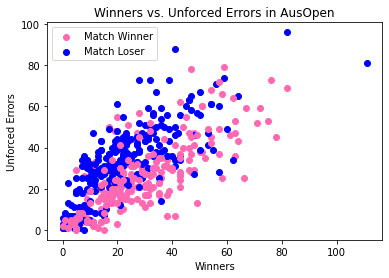

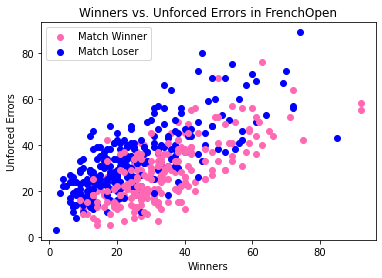

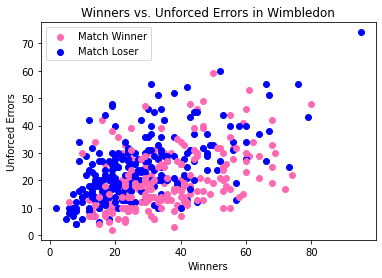

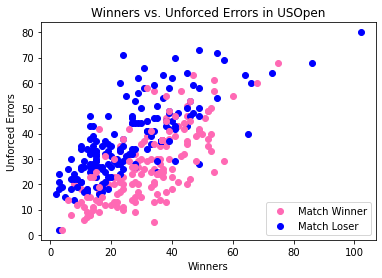

In [25]:
plt_count = 0

# create scatter plot for each grand slam
for gs in grand_slam:
    plt.figure(plt_count)
    plt_count += 1
    plt.title("Winners vs. Unforced Errors in " + gs)
    plt.ylabel("Unforced Errors")
    plt.xlabel("Winners")
    
    # subset winners and losers of each match for specific grand slam
    df_gs_p1 = gs_matches[(gs_matches["GrandSlam"] == gs) & (gs_matches["Result"] == 1)] # Player1 won
    df_gs_p2 = gs_matches[(gs_matches["GrandSlam"] == gs) & (gs_matches["Result"] == 0)] # Player1 lost
    
    # plot number of winners vs unforced errors. hotpink dots represent data points of the
    # winner of the match. blue dots represent data points of the loser of the match
    plt.scatter(df_gs_p1["WNR.1"], df_gs_p1["UFE.1"], color = "hotpink", label = "Match Winner")
    plt.scatter(df_gs_p1["WNR.2"], df_gs_p1["UFE.2"], color = "blue", label = "Match Loser")
    plt.scatter(df_gs_p2["WNR.1"], df_gs_p2["UFE.1"], color = "blue")
    plt.scatter(df_gs_p2["WNR.2"], df_gs_p2["UFE.2"], color = "hotpink")    
    
    plt.legend();

Each of the scatter plots above displays Winners hit vs Unforced errors committed by Match Winners/Losers and separated by grand slam. We want to see if playing on different surfaces affects the number of winners and unforced errors hit as well as how these statistics differ between the winner and loser of the match. In all four grand slams, the match winner consistently committed less unforced errors and more winners. This is clear since the hot pink dots are generally lower than and to the right of the blue dots. The Australian Open and US Open have similar plots in that a player hit upwards of 100 winners in a match, and there is a good spread of winners through 60 and unforced errors through 70. For the French Open, a good number of points are boxed within 60 winners and 60 unforced errors. For Wimbledon, the data points are primarily less than 70 winners and 60 unforced errors. The reason why the Australian Open and US Open have similar distribution may be because they are both played on hard courts, while the French Open is played on clay and Wimbledon is played grass.

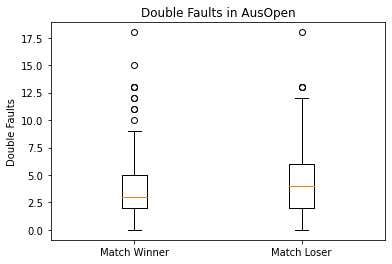

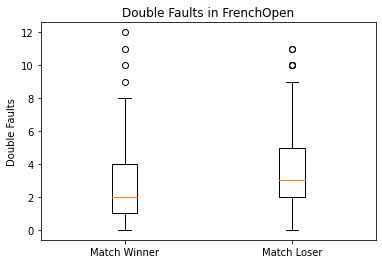

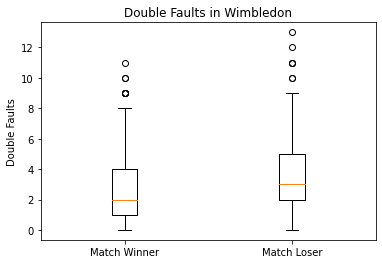

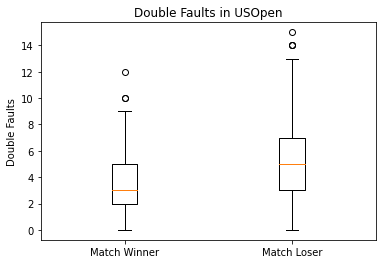

In [26]:
plt_count = 0

# create scatter plot for each grand slam
for gs in grand_slam:
    plt.figure(plt_count)
    plt_count += 1
    plt.title("Double Faults in " + gs)
    plt.ylabel("Double Faults")
    
    # subset winners and losers of each match for specific grand slam
    df_gs_p1 = gs_matches[(gs_matches["GrandSlam"] == gs) & (gs_matches["Result"] == 1)] # Player1 won
    df_gs_p2 = gs_matches[(gs_matches["GrandSlam"] == gs) & (gs_matches["Result"] == 0)] # Player1 lost
    
    # create list of double fault values for winners/losers of each match
    winner_dbf = df_gs_p1["DBF.1"].tolist() + df_gs_p2["DBF.2"].tolist() # match winner's double faults
    loser_dbf = df_gs_p1["DBF.2"].tolist() + df_gs_p2["DBF.1"].tolist() # match loser's double faults
    
    plt.boxplot([winner_dbf, loser_dbf], labels=["Match Winner", "Match Loser"])

Double faults seems like a reasonable variable to look into. One would expect that the loser of the match hits more double faults. The box plots above display the double faults hit by the match winners/losers, differentiated by grand slam. In all four plots, the median of double faults commited is high for the match loser than for the match winner, as expected. Similar to what we observed above, the distribution of double faults in the Australian Open and US Open are similar. In both of these tournaments, players hit more than 12 double faults in a match. Hitting more than 12 double faults in one match is extremely rare in the French Open and Wimbledon.

Based on the heatmap, we said that break points created and break points won have the strongest correlation with result. We analyze these two variables more in depth below. 

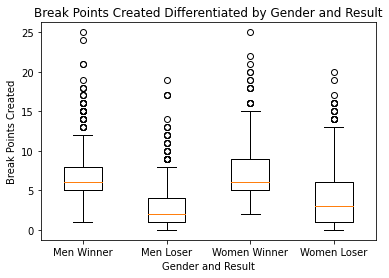

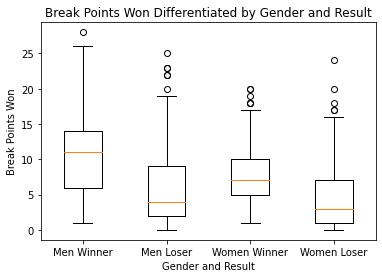

In [27]:
plt_count = 0

# create box plots for each variable
for bp in ["BPC", "BPW"]:
    plt.figure(plt_count)
    plt_count += 1
    plt.title("Break Points " + ("Created" if bp == "BPC" else "Won") + " Differentiated by Gender and Result")
    plt.ylabel("Break Points " + ("Created" if bp == "BPC" else "Won"))
    plt.xlabel("Gender and Result")
    
    # subset winners and losers of each match by gender
    df_men_loser = gs_matches[(gs_matches["Gender"] == "men") & (gs_matches["Result"] == 0)] # Men's Player1 lost
    df_women_loser = gs_matches[(gs_matches["Gender"] == "women") & (gs_matches["Result"] == 0)] # Women's Player1 lost
    df_men_winner = gs_matches[(gs_matches["Gender"] == "men") & (gs_matches["Result"] == 1)] # Men's Player1 won
    df_women_winner = gs_matches[(gs_matches["Gender"] == "women") & (gs_matches["Result"] == 1)] # Women's Player1 won
        
    # create list of break points created/won for winners/losers of each match by gender
    men_winner_bp = df_men_loser[bp + ".2"].tolist() + df_men_winner[bp + ".1"].tolist() # Men's winner break points
    men_loser_bp = df_men_loser[bp + ".1"].tolist() + df_men_winner[bp + ".2"].tolist() # Men's loser break points
    women_winner_bp = df_women_loser[bp + ".2"].tolist() + df_women_winner[bp + ".1"].tolist() # Women's winner break points
    women_loser_bp = df_women_loser[bp + ".1"].tolist() + df_women_winner[bp + ".2"].tolist() # Women's loser break points
        
    plt.boxplot([men_winner_bp, men_loser_bp, women_winner_bp, women_loser_bp], labels=["Men Winner", "Men Loser", "Women Winner", "Women Loser"])

The first thing we notice is that the number of break points won is greater than the number of break points created, which is impossible. For example, the highest outlier in break points won by the Men's loser is 25 while the maximum number of break points created by the Men's loser is around 20. Similarly, the Women's loser has a maximum above 20 while the maximum number of break points created never exceeds 20. Further analysis is required. 

In [28]:
print(str(gs_matches[(gs_matches["BPW.1"] > gs_matches["BPC.1"]) | (gs_matches["BPW.2"] > gs_matches["BPC.2"])].shape[0]) + \
     " rows where break points won is greater than break points created")

607 rows where break points won is greater than break points created


It appears that "BPC.X" and "BPW.X" may have been mislabelled in the original dataset. To correct this issue, we swap the values of "BPC.X" and "BPW.X" if the number of break points won is greater than the number of break points created. 

In [29]:
# iterate through all rows of dataframe
for index, row in gs_matches.iterrows():
    # swap "BPC.X" and "BPW.X" is the number of break points won is greater than the number of break 
    # points created. process done for both players
    if row["BPW.1"] > row["BPC.1"]:
        gs_matches.loc[index,["BPC.1", "BPW.1"]] = gs_matches.loc[index,["BPW.1", "BPC.1"]].values
    if row["BPW.2"] > row["BPC.2"]:
        gs_matches.loc[index,["BPC.2", "BPW.2"]] = gs_matches.loc[index,["BPW.2","BPC.2"]].values

In [30]:
gs_matches[(gs_matches["BPW.1"] > gs_matches["BPC.1"]) | (gs_matches["BPW.2"] > gs_matches["BPC.2"])]

,Result,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,...,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,Gender,GrandSlam


There are no longer any instances where the number of break points won exceeds the number of break points created. Thus, we recreate the box plots from above with the fixed data. 

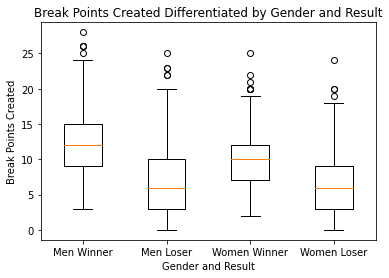

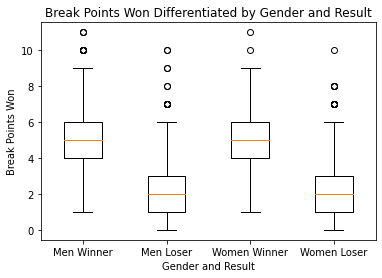

In [31]:
plt_count = 0

# create box plots for each variable
for bp in ["BPC", "BPW"]:
    plt.figure(plt_count)
    plt_count += 1
    plt.title("Break Points " + ("Created" if bp == "BPC" else "Won") + " Differentiated by Gender and Result")
    plt.ylabel("Break Points " + ("Created" if bp == "BPC" else "Won"))
    plt.xlabel("Gender and Result")
    
    # subset winners and losers of each match by gender
    df_men_loser = gs_matches[(gs_matches["Gender"] == "men") & (gs_matches["Result"] == 0)] # Men's Player1 lost
    df_women_loser = gs_matches[(gs_matches["Gender"] == "women") & (gs_matches["Result"] == 0)] # Women's Player1 lost
    df_men_winner = gs_matches[(gs_matches["Gender"] == "men") & (gs_matches["Result"] == 1)] # Men's Player1 won
    df_women_winner = gs_matches[(gs_matches["Gender"] == "women") & (gs_matches["Result"] == 1)] # Women's Player1 won
        
    # create list of break points created/won for winners/losers of each match by gender
    men_winner_bp = df_men_loser[bp + ".2"].tolist() + df_men_winner[bp + ".1"].tolist() # Men's winner break points
    men_loser_bp = df_men_loser[bp + ".1"].tolist() + df_men_winner[bp + ".2"].tolist() # Men's loser break points
    women_winner_bp = df_women_loser[bp + ".2"].tolist() + df_women_winner[bp + ".1"].tolist() # Women's winner break points
    women_loser_bp = df_women_loser[bp + ".1"].tolist() + df_women_winner[bp + ".2"].tolist() # Women's loser break points
        
    plt.boxplot([men_winner_bp, men_loser_bp, women_winner_bp, women_loser_bp], labels=["Men Winner", "Men Loser", "Women Winner", "Women Loser"])

From the box plots, it is clear that the winners of the match overall created more break points and won break points. This is the same regardless of gender. This makes sense in tennis because breaking serve is rather difficult, espcially against good servers. The server has several advantages:
- the server may hit such a good serve that it cannot be returned
- a well-placed serve can leave the returner out of position and on the defensive

In a match between good servers, break points often determine the outcome of the match. It is interesting that between genders, there is not much difference in the distribution of break points created/won. It is often thought that men's service games are stronger, and thus hard to break, than women's. Based on the plots, this is not the case. 

Because the columns associated with break points were switched, I checked to see if something similar happened with net points attempted and net points won. These pairs of columns are the only ones the depend on each other. 

In [32]:
print(str(gs_matches[(gs_matches["NPW.1"] > gs_matches["NPA.1"]) | (gs_matches["NPW.2"] > gs_matches["NPA.2"])].shape[0]) + \
     " rows where net points won is greater than net points attempted")

607 rows where net points won is greater than net points attempted


It is curious that there are the same number of rows that mixed up break points and net points. Without investigating further, we swap the values of "NPA.X" and "NPW.X" if the number of net points won is greater than the number of net points attempted. 

In [33]:
# iterate through all rows of dataframe
for index, row in gs_matches.iterrows():
    # swap "BPC.X" and "BPW.X" is the number of break points won is greater than the number of break 
    # points created. process done for both players
    if row["NPW.1"] > row["NPA.1"]:
        gs_matches.loc[index,["NPA.1", "NPW.1"]] = gs_matches.loc[index,["NPW.1", "NPA.1"]].values
    if row["NPW.2"] > row["NPA.2"]:
        gs_matches.loc[index,["NPA.2", "NPW.2"]] = gs_matches.loc[index,["NPW.2","NPA.2"]].values

In [34]:
gs_matches[(gs_matches["NPW.1"] > gs_matches["NPA.1"]) | (gs_matches["NPW.2"] > gs_matches["NPA.2"])]

,Result,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,...,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,Gender,GrandSlam


## Analysis, Hypothesis Testing, Machine Learning

I decided to perform feature selection using the [ANOVA F-Test](https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476). The ANOVA F-Test tells us if there's a significant relationship between a numeric variable and a categorgical variable. This is appliable since I want to see if there is a relationship between match statistics (numeric) and the classification target variable (categorical). Since the ANOVA F-Test tells us which variables have a significant relationship with the match result, we are able to select significant features in prediction match results. When performing our ANOVA F-Test, our hypotheses are as follows:

**Null Hypothesis:** There is no relationship between the two variables. <br>
**Alternative Hypothesis:** There is a relationship between the two variables.

In [35]:
# retrieve numpy array
dataset = gs_matches.values
# split into input (x) and output (y) variables
x = dataset[:, 1:-2]
y = dataset[:,0].astype('int')

In [36]:
 # split data into training (80%) and testing (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# summarize
print("# of training data points: %d" % x_train.shape[0])
print("# of testing data points: %d" % x_test.shape[0])
print("Class labels:", np.unique(y))

# of training data points: 734
# of testing data points: 184
Class labels: [0 1]


We split the data into training and test sets so we can fit and evaluate a learning model. Using a 80-20 split, we have 734 instances used to train the model and 184 to test the model. 

Below, we run the ANOVA F-Test for each variable against match results. The scikit-learn machine library provides an implementation of the ANOVA F-Test in the [f_classif() function](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html). This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the [SelectKBest class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html). For example, we can define the SelectKBest class to use the f_classif() function and select all features, then transform the train and test sets.

FSP.1: score = 12.895892, p-value = 0.000351 --> Reject
FSW.1: score = 5.536601, p-value = 0.018886 --> Reject
SSP.1: score = 12.243709, p-value = 0.000495 --> Reject
SSW.1: score = 1.738170, p-value = 0.187783 --> Fail to Reject
ACE.1: score = 10.711069, p-value = 0.001115 --> Reject
DBF.1: score = 19.351889, p-value = 0.000012 --> Reject
WNR.1: score = 20.541597, p-value = 0.000007 --> Reject
UFE.1: score = 37.808827, p-value = 0.000000 --> Reject
BPC.1: score = 221.734391, p-value = 0.000000 --> Reject
BPW.1: score = 555.930983, p-value = 0.000000 --> Reject
NPA.1: score = 0.251894, p-value = 0.615896 --> Fail to Reject
NPW.1: score = 2.417146, p-value = 0.120446 --> Fail to Reject
FSP.2: score = 8.512027, p-value = 0.003636 --> Reject
FSW.2: score = 31.551333, p-value = 0.000000 --> Reject
SSP.2: score = 8.512027, p-value = 0.003636 --> Reject
SSW.2: score = 20.461338, p-value = 0.000007 --> Reject
ACE.2: score = 28.734489, p-value = 0.000000 --> Reject
DBF.2: score = 21.185417, p-

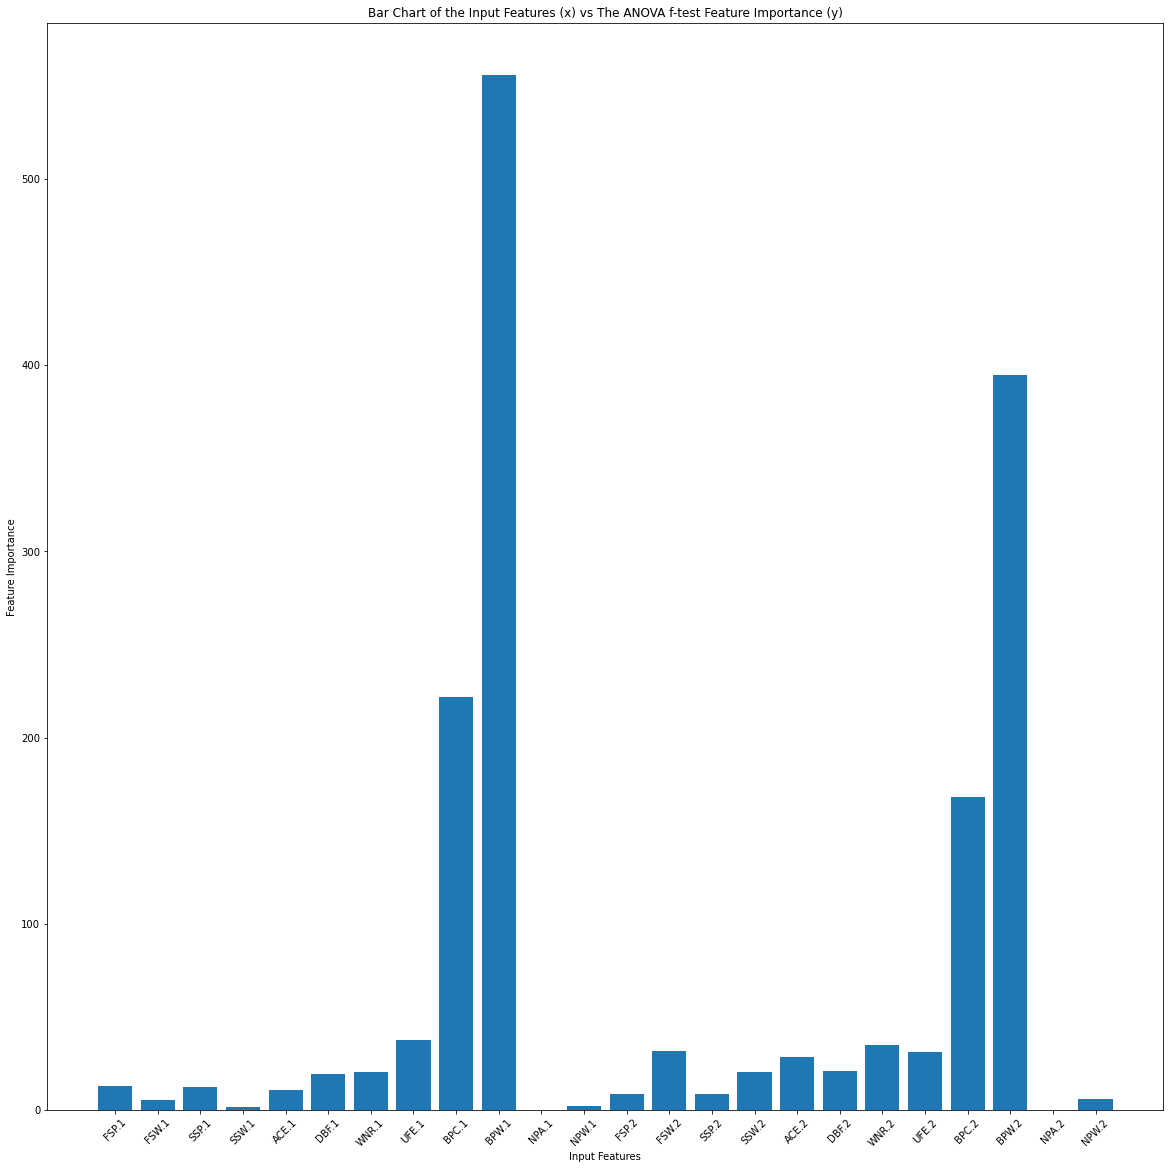

In [37]:
# feature selection
def select_features(x_train, y_train, x_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k=4)
    # learn relationship from training data and transform train input data
    x_train_fs = fs.fit_transform(x_train, y_train)
    # transform test input data
    x_test_fs = fs.transform(x_test)
    
    return x_train_fs, x_test_fs, fs

x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)

# what are scores and p-values for the features
for i in range(len(fs.scores_)):
    print(gs_matches.columns[i+1] + ": score = %f, p-value = %f --> " % (fs.scores_[i], fs.pvalues_[i]) \
          + ("Reject" if fs.pvalues_[i] < 0.05 else "Fail to Reject") )
    
# plot the scores
plt.figure(figsize=(20,20))
plt.bar(gs_matches.columns[1:-2], fs.scores_)

# Define axes label and title
plt.title("Bar Chart of the Input Features (x) vs The ANOVA f-test Feature Importance (y)")
plt.xlabel("Input Features")
plt.ylabel("Feature Importance")

plt.xticks(rotation = 45)

plt.show()

When running the ANOVA F-Test, each variable is assigned a score, larger is better. A larger score indicates a more significant relationship with match results. Thus, the input variables with the highest scores are chosen as the most significant features. In this case, we can see that some features stand out as perhaps being more relevant than others, with much larger test statistic values. "BPC.X" and "BPW.X" notably have the highest scores and interestingly the lowest p-values. A p-value of less than 0.05 indicates a siginficant relationship with the target classification variable, and thus we reject the null hypothesis. Otherwise, we fail to reject. It appears the 4 out of the 24 features do not have a significant relationship with the match result, and thus are not significant features. The bar plot displayed visualizes the scores of each of the variables. It is clear that "BPC.X" and "BPW.X" have the highest scores by far and that the non-signficant features have scores close to 0. 

In [38]:
# prints information about classification
def print_results(y_test, y_pred):
    # number of match results classified incorrectly
    print("Misclassified samples: %d" % (y_test != y_pred).sum())
    # percent of matches classified correctly
    print("Accuracy: %.5f" % (met.accuracy_score(y_test, y_pred)*100), "%")
    # percent of matches classified incorrectly
    print("Error rate: %.5f" % (100 - met.accuracy_score(y_test, y_pred)*100), "%")

# prints confusion matrix of classification
def confusion_matrix(y_test, y_pred, y):
    actual = np.array(y_test)
    clf_pred = np.array(y_pred)
    cm = met.confusion_matrix(actual, clf_pred, labels=np.unique(y))
    disp = met.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y))
    disp.plot()
    plt.show()

Given we have selected the most significant features in predicting match results, we want to see how our selected features impact our prediction models. For Decision Tree Classification and Logistic Regression, I will evaluate each model with all features compared to a model built from features selected by ANOVA F-Test. The model with the significant features should be more accurate than the model with all features as it only focuses on the influential features. For each of the tests, the first model uses all of the features and the second model uses only the selected features. I use accuracy and error rate to compare their predictive performance. 

In [39]:
# initalize the classifier
clf = DecisionTreeClassifier()
# fitting the training data
clf.fit(x_train, y_train)
# predict the response for test dataset
y_pred = clf.predict(x_test)

Misclassified samples: 14
Accuracy: 92.39130 %
Error rate: 7.60870 %


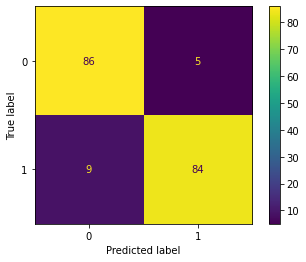

In [40]:
# summarize results
print_results(y_test, y_pred)
# print confusion matrix
confusion_matrix(y_test, y_pred, y)

In [41]:
# fitting the training data
clf.fit(x_train_fs, y_train)
# predict the response for test dataset
y_pred = clf.predict(x_test_fs)

Misclassified samples: 11
Accuracy: 94.02174 %
Error rate: 5.97826 %


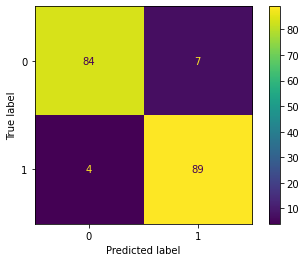

In [42]:
# summarize results
print_results(y_test, y_pred)
# print confusion matrix
confusion_matrix(y_test, y_pred, y)

The Decision Tree Model fit on the training dataset and evaluated on the test dataset achieves a classification accuracy of 92.39% and error rate of 7.61%. Of the 184 instances in the test dataset, only 14 were misclassified. The confusion matrix shows that 10 matches were Player1 won were classied as a lost and the remaining 4 were classifed the other way.

In the Decision Tree Model fit and evaluated on data using this feature selection method, it achieves a classification accuracy of 94.02% and error rate of 5.98%. Of the 184 instances in the test dataset, only 11 were misclassified. In this case, we see that the model achieved a lift in performance compared to the baseline that achieved 92.39% accuracy.

In [43]:
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
# evaluate the model
y_pred = model.predict(x_test)

Misclassified samples: 7
Accuracy: 96.19565 %
Error rate: 3.80435 %


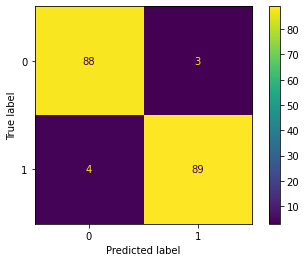

In [44]:
# summarize results
print_results(y_test, y_pred)
# print confusion matrix
confusion_matrix(y_test, y_pred, y)

In [45]:
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(x_train_fs, y_train)
# evaluate the model
y_pred = model.predict(x_test_fs)

Misclassified samples: 8
Accuracy: 95.65217 %
Error rate: 4.34783 %


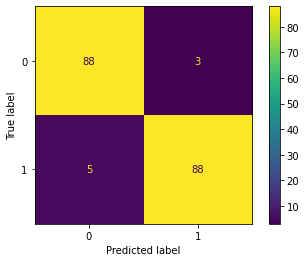

In [46]:
# summarize results
print_results(y_test, y_pred)
# print confusion matrix
confusion_matrix(y_test, y_pred, y)

The Logistic Regression Model fit on the training dataset and evaluated on the test dataset achieves a classification accuracy of 92.6% and error rate of 3.8%. Of the 184 instances in the test dataset, only 7 were misclassified. The confusion matrix shows that 4 matches were Player1 won were classied as a lost and the remaining 3 were classifed the other way.

In the Logistic Regression Model fit and evaluated on data using this feature selection method, it achieves a classification accuracy of 95.65% and error rate of 4.35%. Of the 184 instances in the test dataset, only 8 were misclassified. In this case, we see that the model accuracy decreased from the baseline accuracy. Seeing that we only selected the top four features to fit the model, below we systematically test a range of different numbers of selected features and discover which results in the best performing model. We perform a grid search, where the k argument of the SelectBest class can be tuned. We evaluate model configurations on classification tasks using repeated stratified k-fold cross-validation. We will use three repeats of 10-fold cross-validation via the RepeatedStratifiedKFold class. In this case, we will use the ANOVA F-Test statistical method for selecting features that will be used to fit a Logistic Regression Model. More information about the process below can be found [here](https://machinelearningmastery.com/feature-selection-with-numerical-input-data/).

>1 0.81697 (0.03213)
>2 0.94664 (0.02011)
>3 0.94952 (0.01814)
>4 0.95207 (0.01961)
>5 0.95207 (0.02329)
>6 0.94698 (0.02003)
>7 0.94699 (0.02078)
>8 0.94699 (0.02134)
>9 0.94554 (0.01987)
>10 0.94771 (0.02074)
>11 0.94881 (0.02048)
>12 0.94916 (0.02128)
>13 0.95026 (0.02115)
>14 0.95172 (0.01978)
>15 0.94990 (0.01956)
>16 0.94954 (0.01914)
>17 0.94845 (0.01817)
>18 0.94772 (0.01762)
>19 0.94845 (0.01752)
>20 0.94918 (0.01692)
>21 0.94736 (0.01777)
>22 0.94736 (0.02122)
>23 0.94809 (0.02057)
>24 0.94700 (0.02076)


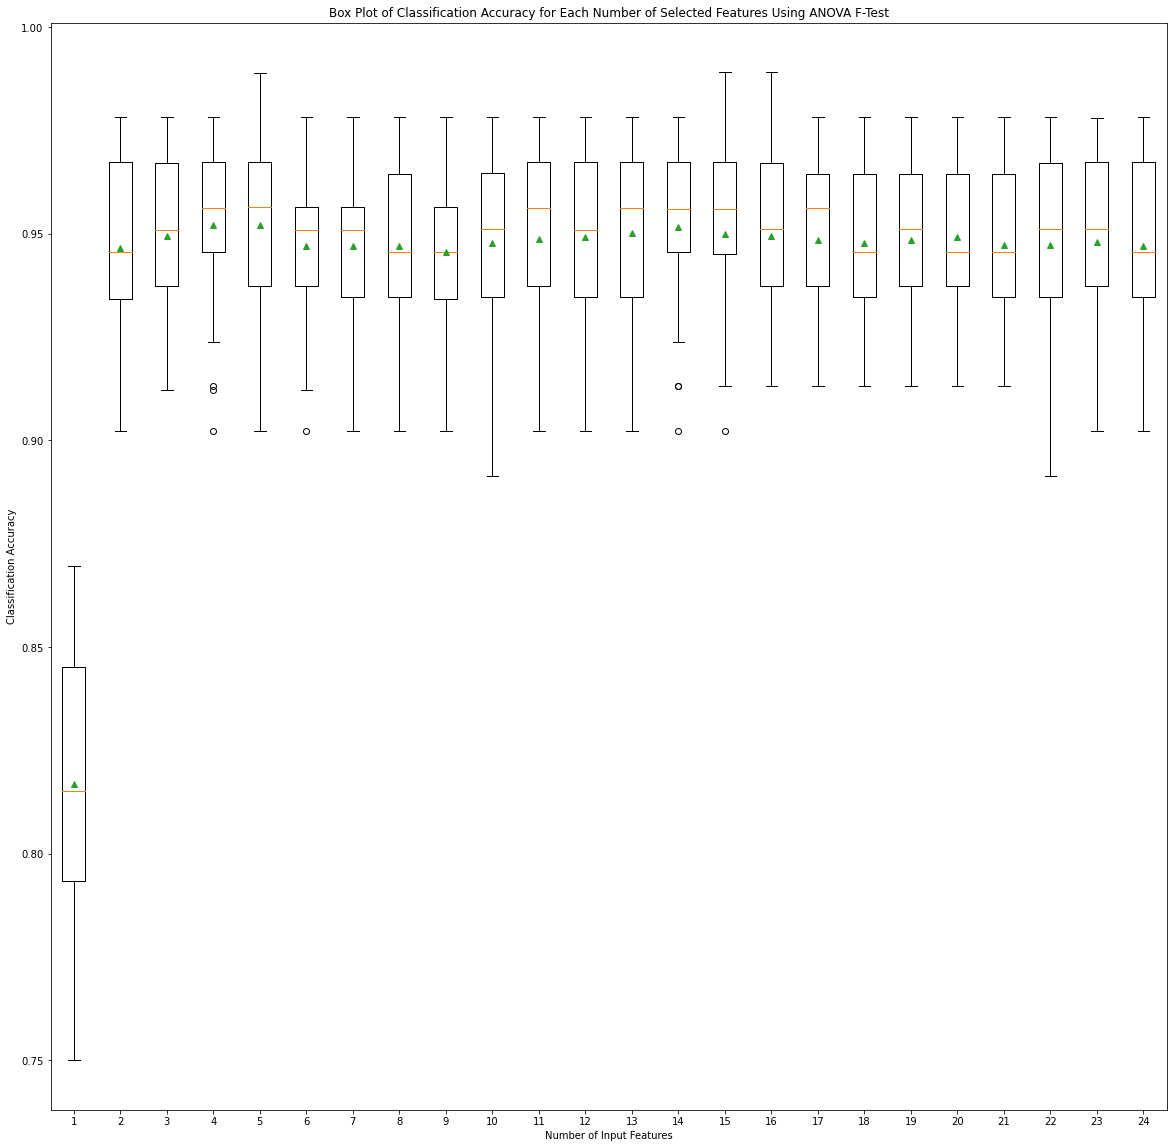

In [47]:
# evaluate a give model using cross-validation
def evaluate_model(model, x, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define number of features to evaluate
num_features = [i+1 for i in range(x.shape[1])]
# enumerate each number of features
results = list()
for k in num_features:
    # create pipeline
    model = LogisticRegression(solver='liblinear')
    fs = SelectKBest(score_func=f_classif, k=k)
    pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
    # evaluate the model
    scores = evaluate_model(pipeline, x, y)
    results.append(scores)
    # summarize the results
    print('>%d %.5f (%.5f)' % (k, np.mean(scores), np.std(scores)))
    
# plot model performance for comparison
plt.figure(figsize=(20,20))
plt.boxplot(results, labels=num_features, showmeans=True)

# Define axes label and title
plt.title("Box Plot of Classification Accuracy for Each Number of Selected Features Using ANOVA F-Test")
plt.xlabel("Number of Input Features")
plt.ylabel("Classification Accuracy")

plt.show()

We want to see the relationship between the number of selected features and classification accuracy. In this relationship, we expect that more features result in a better performance to a certain degree. Printed above is the mean accuracy scores and standard devation given the number of features selected. In this case, it looks like four or five features results in roughly the same accuracy. Except for training the model on one feature, select any number of features results in around 94-95% accuracy. The box plots are created side-by-side showing the trend in increasing mean accuracy with the number of selected features to five features, after which is becomes some stable. Seeing that we initally trained our Logistic Regression model with the dataset with the four most significant features, it may be more appropriate to select five features in this case.

## Insight and Conclusion

In this tutorial, we wanted to determine which match statistics are most significant in predicting the outcome of the match. In our data processing and explorary analysis section, we noted disparities in the data and explored how each statistic is unique for each grand slam and each gender. We discovered that break points created and break points won had the highest correlation with the match result. This was something we noted and analyzed further the the machine learning section. We conducted an ANOVA F-Test to determine exactly which player statistics is related to the match result. At the end, we were able to determine that break points created and break points won had the most siginficant relationship with match result. This is in line with the correlation pattern we noted earlier. Winners and unforced errors also had a significant relationship with the match result. This is consistent with the scatter plots created in the exploratory analysis section. The match winner generally hit more winners and commited less unforced errors than their opponents. Of the 24 input features, only 4 did not have a signficant relationship with the match result. While using the top four features ("BPC.1", "BPW.1", "BPC.2", "BPW.2") yielded a higher accuracy rate in the Decision Tree model compared to when we used all the variables, this was not the case for the Logistic Regression Model. Further tuning of the number of features for the Logistic Regression Model revealed that either four or five features would yield the higest accuracy rate. In all, we have shown that we can select signficant features to predict the outcome of a match tennis with fairly high accuracy.

## Resources

The following are resources to better understand the skills used and topics discussed in the project:

- [Dataset](https://archive.ics.uci.edu/ml/datasets/Tennis+Major+Tournament+Match+Statistics)
- [Tennis Terminology](https://en.wikipedia.org/wiki/Glossary_of_tennis_terms)
- [Important Statistics in Tennis](https://bleacherreport.com/articles/1721941-the-five-most-important-statistics-in-mens-tennis)
- [The Importance of Statistics for Tennis Players](https://smashpoint.pro/importance-statistics-tennis-players/)
- [ANOVA F-Test for Feature Selection](https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476)
- [Tuning Feature Selection](https://machinelearningmastery.com/feature-selection-with-numerical-input-data/)
- [Scikit-learn Feature_Selection Functions](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)
